In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()

df = pd.read_csv("Temp2.csv", index_col=0)

df = df[1:-1]

for col in df.columns:
    if "Close" in col or "Low" in col or "High" in col:
        if "Change" not in col:
            for idx in df[col].index:
                if idx < 748:
                    df.loc[idx, f"Next_{col}"] = df.loc[idx+1, col]

df = df[1:-1]
#temp_df = pd.DataFrame()
temp_df = pd.read_csv("gen_df3.csv", index_col=0)
# for i in range(11):
#     X_target = df
#     for col in X_target.columns:
#         if "Target" in col or "Spread" in col or "Change" in col or "Open" in col or "Date" in col or "Next" in col:
#             if "Open_Interest_All" != col:
#                 X_target = X_target.drop([col], axis=1)

#     X_scaler = scaler_feature.fit_transform(X_target)

#     y_target = df
#     for col in y_target.columns:
#         if "Target" not in col or "Spread" in col or "Change" in col:
#             y_target = y_target.drop([col], axis=1)
    
#     X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_target, test_size=0.1, shuffle=True)

#     for col in y_test.columns:
#         y_train_current = y_train[col]
#         y_test_current = y_test[col]

#         nn = MLPRegressor(alpha=1e-05, early_stopping=False, hidden_layer_sizes=5000, learning_rate='adaptive', learning_rate_init=0.001, max_iter=10000, n_iter_no_change=10, solver='adam', tol=1e-05, verbose=False)
#         nn.fit(X_train, y_train_current)
#         pred = nn.predict(X_test)
#         for i, idx in enumerate(y_test_current.index):
#             temp_df.loc[idx, col] = pred[i]
            

#     for col in X_target.columns:
#         if "Close" in col or "Low" in col or "High" in col:
#             for idx in y_test.index:
#                 if idx < 747:
#                     temp_df.loc[idx, f"Next_{col}"] = df.loc[idx, f"Next_{col}"]
#                     temp_df.loc[idx, col] = df.loc[idx, col]

#     temp_df.to_csv('gen_df3.csv')

temp_df = temp_df.sort_index()
temp_df = temp_df[:-1]
final_df = pd.DataFrame()
for i in range(11):
    X_target = temp_df
    for col in X_target.columns:
        if "Next" in col or ("Target" not in col and "Close" not in col and "Low" not in col and "High" not in col):
            X_target = X_target.drop([col], axis=1)
    X_scaler = scaler_feature.fit_transform(X_target)

    y_target = temp_df
    for col in y_target.columns:
        if "Next" not in col:
            y_target = y_target.drop([col], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_target, test_size=0.1, shuffle=True)

    for col in y_test.columns:
        y_train_current = y_train[col]
        y_test_current = y_test[col]

        nn = MLPRegressor(alpha=1e-05, early_stopping=False, hidden_layer_sizes=5000, learning_rate='adaptive', learning_rate_init=0.001, max_iter=10000, n_iter_no_change=10, solver='adam', tol=1e-05, verbose=False)
        nn.fit(X_train, y_train_current)
        pred = nn.predict(X_test)

        for i, idx in enumerate(y_test_current.index):
            final_df.loc[idx, f"pred_{col}"] = pred[i]
            final_df.loc[idx, col] = temp_df.loc[idx, col]
    final_df.to_csv('final_df.csv')



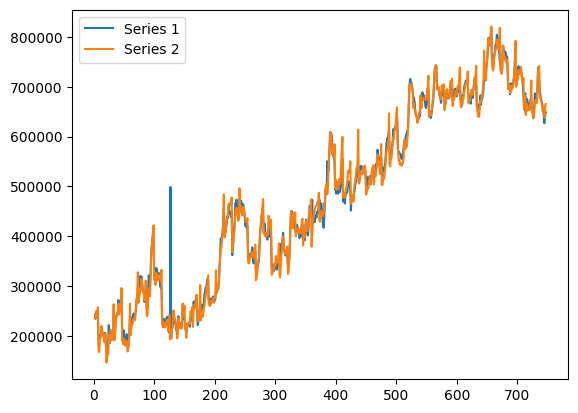

In [19]:
import matplotlib.pyplot as plt

# Sample data
temp_df = temp_df.sort_index()
x = temp_df.index
y1 = temp_df.Target_Open_Interest_All
y2 = df.Open_Interest_All

# Plot the first series
plt.plot(x, y1, label='Series 1')

# Plot the second series
plt.plot(x, y2, label='Series 2')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()

df = pd.read_csv("Temp2.csv", index_col=0)

df = df[1:-1]

for col in df.columns:
    if "Close" in col or "Low" in col or "High" in col:
        if "Change" not in col:
            for idx in df[col].index:
                if idx < 748:
                    df.loc[idx, f"Next_{col}"] = df.loc[idx+1, col]

df = df[1:-1]
#temp_df = pd.DataFrame()
temp_df = pd.read_csv("gen_df3.csv", index_col=0)
for i in range(1):
    X_target = df
    for col in X_target.columns:
        if "Target" in col or "Spread" in col or "Change" in col or "Open" in col or "Date" in col or "Next" in col:
            if "Open_Interest_All" != col:
                X_target = X_target.drop([col], axis=1)

    X_train = X_target
    X_test = X_target
    for idx in X_target.index:
        if idx in temp_df.index:
            X_test = X_test.drop([idx])
        else:
            X_train = X_train.drop([idx])

    scaler_feature = scaler_feature.fit(X_target)
    X_train = scaler_feature.transform(X_train)
    X_test = scaler_feature.transform(X_test)

    y_target = df
    for col in y_target.columns:
        if "Target" not in col or "Spread" in col or "Change" in col:
            y_target = y_target.drop([col], axis=1)

    y_train = y_target
    y_test = y_target
    for idx in y_target.index:
        if idx in temp_df.index:
            y_test = y_test.drop([idx])
        else:
            y_train = y_train.drop([idx])

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    # y_train = np.array(y_train)
    # y_test = np.array(y_test)
    
    for col in y_test.columns:
        y_train_current = y_train[col]
        y_test_current = y_test[col]

        nn = MLPRegressor(alpha=1e-05, early_stopping=False, hidden_layer_sizes=5000, learning_rate='adaptive', learning_rate_init=0.001, max_iter=10000, n_iter_no_change=10, solver='adam', tol=1e-05, verbose=False)
        nn.fit(X_train, y_train_current)
        pred = nn.predict(X_test)
        for i, idx in enumerate(y_test_current.index):
            temp_df.loc[idx, col] = pred[i]
            

    for col in X_target.columns:
        if "Close" in col or "Low" in col or "High" in col:
            for idx in y_test.index:
                if idx < 747:
                    temp_df.loc[idx, f"Next_{col}"] = df.loc[idx, f"Next_{col}"]
                    temp_df.loc[idx, col] = df.loc[idx, col]

    temp_df.to_csv('gen_df3.csv')



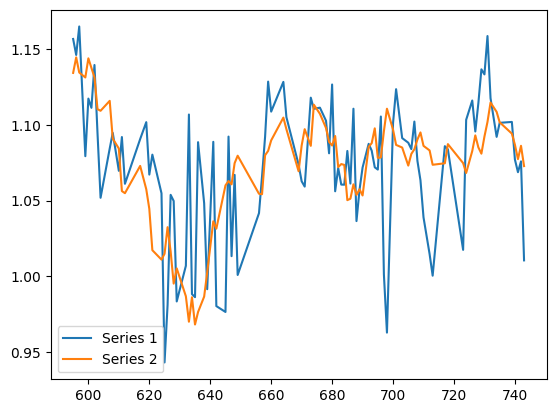

In [26]:
import matplotlib.pyplot as plt

final_df = final_df.sort_index()
# Sample data
x = final_df.index[-100:]
y1 = final_df.pred_Next_Close_0[-100:]
y2 = final_df.Next_Close_0[-100:]

# Plot the first series
plt.plot(x, y1, label='Series 1')

# Plot the second series
plt.plot(x, y2, label='Series 2')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [20]:
final_df.pred_Next_Low_0

4      1.223521
5      1.269333
6      1.286341
7      1.277701
8      1.364398
         ...   
739    1.132226
740    1.099339
741    1.080400
742    1.079813
743    1.039265
Name: pred_Next_Low_0, Length: 505, dtype: float64

In [21]:
final_df.pred_Next_High_0

4      1.287080
5      1.330424
6      1.287963
7      1.330948
8      1.521163
         ...   
739    1.122665
740    1.110606
741    1.104451
742    1.093920
743    1.023868
Name: pred_Next_High_0, Length: 505, dtype: float64